In [30]:
%matplotlib inline
from scone_phobia import apply_analysis
from scone_phobia.analyses.RL_AmEnglish import RL_AmEnglish as AE_RL
import scone_phobia.metadata.add_metadata as add_metadata
import seaborn

mp_folder = '../../mpscores'

# select relevant models among all those potentially in mp_folder
mAE = 'AMnnet1_tri2_smbr_LMmonomodel__BUCtrain__WSJtest__KLdis'
mJ = 'AMnnet1_tri2_smbr_LMmonomodel__CSJtrain__WSJtest__KLdis'
filt = lambda mp_fname: mAE in mp_fname or mJ in mp_fname

# launch analyses without resampling
df_rl = apply_analysis(AE_RL,
                       mp_folder,
                       filt=filt,
                       add_metadata=add_metadata.language_register,
                       resampling=False)
df_rl

,contrast,dissimilarity,error,model type,test language,test register,test set,training language,training register,training set
0,L-R,KL,24.020161,AMnnet1_tri2_smbr_LMmono,American English,Read,WSJ,Japanese,Spontaneous,CSJ
1,W-Y,KL,5.773129,AMnnet1_tri2_smbr_LMmono,American English,Read,WSJ,Japanese,Spontaneous,CSJ
2,L-R,KL,0.953476,AMnnet1_tri2_smbr_LMmono,American English,Read,WSJ,American English,Spontaneous,BUC
3,W-Y,KL,0.803419,AMnnet1_tri2_smbr_LMmono,American English,Read,WSJ,American English,Spontaneous,BUC
4,all_C,KL,2.472895,AMnnet1_tri2_smbr_LMmono,American English,Read,WSJ,American English,Spontaneous,BUC
5,all_C,KL,8.834495,AMnnet1_tri2_smbr_LMmono,American English,Read,WSJ,Japanese,Spontaneous,CSJ


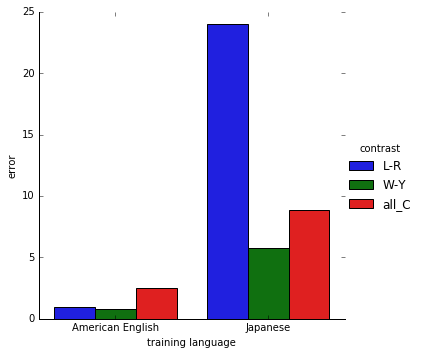

In [31]:
g = seaborn.catplot(x="training language",
                    y="error",
                    hue="contrast",
                    data=df_rl,
                    kind="bar",
                    order=['American English', 'Japanese'],
                    hue_order=['L-R', 'W-Y', 'all_C'],
                    legend=True)